## A Preliminary analysis of the geograhpical distribution of US banks in 2019

### Understanding and Prepossessing the data: 3. Details of three entities (BRH)

In [127]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from IPython.display import Image

In [128]:
# Set the working directory
os.chdir('C:\\Users\\jiash\\Dropbox\\hw\\git\\bank_geo\\data')

# Read the data and the metadata file
brh_raw = pd.read_csv('brh_raw.csv', encoding = "ISO-8859-1")

In [129]:
# verify if varname is a primary key of df
def is_primay_key(df, varname):
    
    # the number of primary keys should match the number of records
    flag = len(df.groupby(varname).size()) == df.shape[0]
    
    return(flag)

# count the occurence of varname in df and add it as a column in df
def add_occurence_to(df, varname):
    
    # frequency of varname in df
    freq = df.groupby(varname).size().reset_index(name='Freq')
    
    df = pd.merge(df, freq, how = 'left', on = varname)
    
    return(df)

def strcol2num(df, varname):
    
    for v in varname:  
        df[v] = df[v].str.replace(',' ,'').astype('float')
        
    return(df)

In [130]:
# Some of the replicates in RSSDID looks like this
pd.set_option('display.max_columns', None)
brh_raw.head()

,Unnamed: 0,ADDRESBR,BKMO,BRCENM,BRNUM,BRSERTYP,CBSA_DIV_NAMB,CITY2BR,CITYBR,CNTRYNAB,CNTYNAMB,CNTYNUMB,CONSOLD,CSABR,CSANAMBR,DEPSUMBR,DIVISIONB,METROBR,MICROBR,MSABR,MSANAMB,NAMEBR,NECNAMB,NECTABR,PLACENUM,SIMS_ACQUIRED_DATE,SIMS_DESCRIPTION,SIMS_ESTABLISHED_DATE,SIMS_LATITUDE,SIMS_LONGITUDE,SIMS_PROJECTION,STALPBR,STCNTYBR,STNAMEBR,STNUMBR,UNINUMBR,YEAR,ZIPBR
0,0,1 Lincoln St. Fl 1,1,M,0,11,"Boston, MA",Boston,Boston,United States,Suffolk,25,NaN,148,"Boston-Worcester-Providence, MA-RI-NH-CT","107,288,000",14454,1,0,14460,"Boston-Cambridge-Newton, MA-NH",State Street Bank And Trust Company,NaN,0,0,NaN,NaN,01/01/1792,42.3526,-71.0579,NaN,MA,25025,Massachusetts,25,6,2019,2111
1,1,600 College Road East,0,N,29,11,NaN,Princeton,Princeton,United States,Mercer,21,NaN,408,"New York-Newark, NY-NJ-CT-PA",0,0,1,0,45940,"Trenton-Princeton, NJ",Princeton Branch,NaN,0,0,NaN,POINTADDRESS,05/15/2009,40.3468,-74.5935,100,NJ,34021,New Jersey,34,614737,2019,8540
2,2,801 Pennsylvania Avenue,0,N,30,11,NaN,Kansas City,Kansas City,United States,Jackson,95,NaN,312,"Kansas City-Overland Park-Kansas City, MO-KS",0,0,1,0,28140,"Kansas City, MO-KS",Kansas City Branch,NaN,0,0,NaN,POINTADDRESS,11/01/2000,39.1041,-94.5909,100,MO,29095,Missouri,29,614738,2019,64105
3,3,100 North Gay Street,1,M,0,11,NaN,Auburn,Auburn,United States,Lee,81,NaN,194,"Columbus-Auburn-Opelika, GA-AL","429,489",0,1,0,12220,"Auburn-Opelika, AL",Auburnbank,NaN,0,0,NaN,POINTADDRESS,01/03/1907,32.6071,-85.4798,100,AL,1081,Alabama,1,17,2019,36830
4,4,132 Fob James Drive,0,NaN,13,11,NaN,Valley,Valley,United States,Chambers,17,NaN,122,"Atlanta--Athens-Clarke County--Sandy Springs, ...","46,479",0,0,1,0,NaN,Valley Branch,NaN,0,0,NaN,M,12/12/2011,32.8154,-85.1789,100,AL,1017,Alabama,1,531906,2019,36854


I find that both NAMEBR + ADDRESBR + BRNUM and UNINUMBR can be used as the primary keys of the table.

In [131]:
# cleaning the BRH data
print('1. Is NAMEBR + ADDRESBR + BRNUM the primary key of hcr_raw?')
is_primay_key(brh_raw, ['NAMEBR', 'ADDRESBR' ,'BRNUM'])

1. Is NAMEBR + ADDRESBR + BRNUM the primary key of hcr_raw?


True

In [132]:
print('2. Is UNINUMBR the primary key of hcr_raw?')
is_primay_key(brh_raw, ['UNINUMBR'])

2. Is UNINUMBR the primary key of hcr_raw?


True

In [133]:
# Clean all the string columns
li = ['DEPSUMBR']
brh_cleaned = strcol2num(brh_raw, li)

In [134]:
# Find top 100 bank branches
brh_top = brh_cleaned.sort_values(by = ['DEPSUMBR'], ascending = False)[0:100]

In [135]:
brh_top.head()

,Unnamed: 0,ADDRESBR,BKMO,BRCENM,BRNUM,BRSERTYP,CBSA_DIV_NAMB,CITY2BR,CITYBR,CNTRYNAB,CNTYNAMB,CNTYNUMB,CONSOLD,CSABR,CSANAMBR,DEPSUMBR,DIVISIONB,METROBR,MICROBR,MSABR,MSANAMB,NAMEBR,NECNAMB,NECTABR,PLACENUM,SIMS_ACQUIRED_DATE,SIMS_DESCRIPTION,SIMS_ESTABLISHED_DATE,SIMS_LATITUDE,SIMS_LONGITUDE,SIMS_PROJECTION,STALPBR,STCNTYBR,STNAMEBR,STNUMBR,UNINUMBR,YEAR,ZIPBR
4616,4616,390 Madison Avenue,0,NaN,544,11,"New York-Jersey City-White Plains, NY-NJ",New York,New York,United States,New York,61,NaN,408,"New York-Newark, NY-NJ-CT-PA",407675546.0,35614,1,0,35620,"New York-Newark-Jersey City, NY-NJ-PA",Madison Ave And 47th St,NaN,0,0,06/20/1992,STREETADDRESS,04/11/1960,40.7560,-73.9769,100,NY,36061,New York,36,183690,2019,10017
17694,17694,101 N. Phillips Avenue,1,M,0,11,NaN,Sioux Falls,Sioux Falls,United States,Minnehaha,99,NaN,0,NaN,353866534.0,0,1,0,43620,"Sioux Falls, SD","Wells Fargo Bank, National Association",NaN,0,0,NaN,POINTADDRESS,01/01/1870,43.5476,-96.7268,100,SD,46099,South Dakota,46,2239,2019,57104
39027,39027,701 East 60th Street North,1,M,0,11,NaN,Sioux Falls,Sioux Falls,United States,Minnehaha,99,NaN,0,NaN,305961000.0,0,1,0,43620,"Sioux Falls, SD","Citibank, National Association",NaN,0,0,NaN,M,06/16/1812,43.6020,-96.7187,100,SD,46099,South Dakota,46,4759,2019,57104
82087,82087,2360 Corporate Circle Suite 400,1,M,0,11,NaN,Henderson,Henderson,United States,Clark,3,NaN,332,"Las Vegas-Henderson, NV",195292000.0,0,1,0,29820,"Las Vegas-Henderson-Paradise, NV",Charles Schwab Bank,NaN,0,0,NaN,POINTADDRESS,04/28/2003,36.0256,-115.0885,100,NV,32003,Nevada,32,363798,2019,89074
13274,13274,100 North Tryon St,1,M,0,11,NaN,Charlotte,Charlotte,United States,Mecklenburg,119,NaN,172,"Charlotte-Concord, NC-SC",144107960.0,0,1,0,16740,"Charlotte-Concord-Gastonia, NC-SC","Bank Of America, National Association",NaN,0,0,NaN,POINTADDRESS,10/17/1904,35.2272,-80.8428,100,NC,37119,North Carolina,37,2238,2019,28202


One bank branch in NY stands out as the one with largest deposits:

In [136]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = brh_top['SIMS_LONGITUDE'],
        lat = brh_top['SIMS_LATITUDE'],
        marker = dict(
            size = brh_cleaned['DEPSUMBR']/5000,
            color = "royalblue",
            line_color = 'rgb(40,40,40)',
            line_width = 0.5,
            sizemode = 'area'
        )))

fig.update_layout(
        title_text = '2019 top 100 bank branches',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)'
        )
    )   

fig.show()

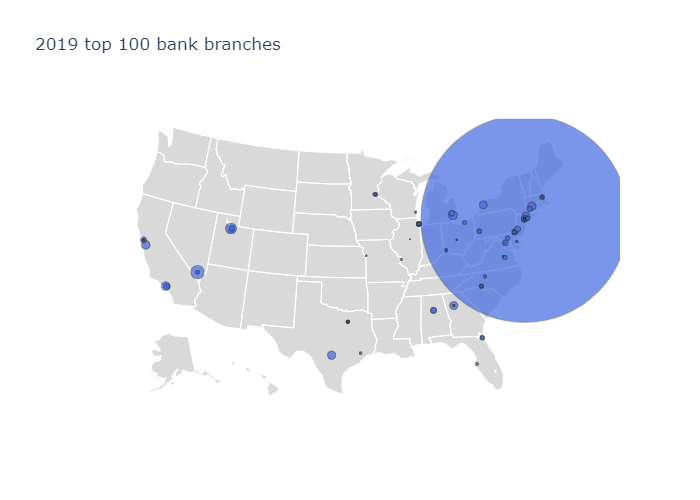

In [137]:
fig.write_image("C:/Users/jiash/Dropbox/hw/git/bank_geo/P2_BRH.png")
Image(filename = 'C:/Users/jiash/Dropbox/hw/git/bank_geo/P2_BRH.png')

In [138]:
brh_cleaned.to_csv('brh_cleaned.csv')